In [2]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#SKLearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# For reproducibility
from teachopencadd.utils import seed_everything
SEED = 42
seed_everything(SEED)

In [3]:
train_file_path = '../Data/Data/train.csv'
test_file_path = '../Data/Data/test.csv'
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)
# train_df = train_df.drop("Id", axis=1)
df_num = train_df.select_dtypes(include = ['float64', 'int64'])
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
x_train_rand_series, x_test_rand_series, y_train_rand, y_test_rand = train_test_split(train_df['MSSubClass'], train_df['SalePrice'], test_size=0.2, random_state=SEED)
x_train_rand = np.array(list(x_train_rand_series)).reshape(-1, 1)
x_test_rand = np.array(list(x_test_rand_series)).reshape(-1, 1)

rfr_def_rand = RandomForestRegressor(random_state=SEED)
rfr_def_rand.fit(x_train_rand, y_train_rand)
y_pred_rand = rfr_def_rand.predict(x_test_rand)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_rand, y_pred_rand))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_rand, y_pred_rand))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_rand, y_pred_rand)))

Mean Absolute Error: 52354.51819604832
Mean Squared Error: 5904120336.862125
Root Mean Squared Error: 76838.27390605626


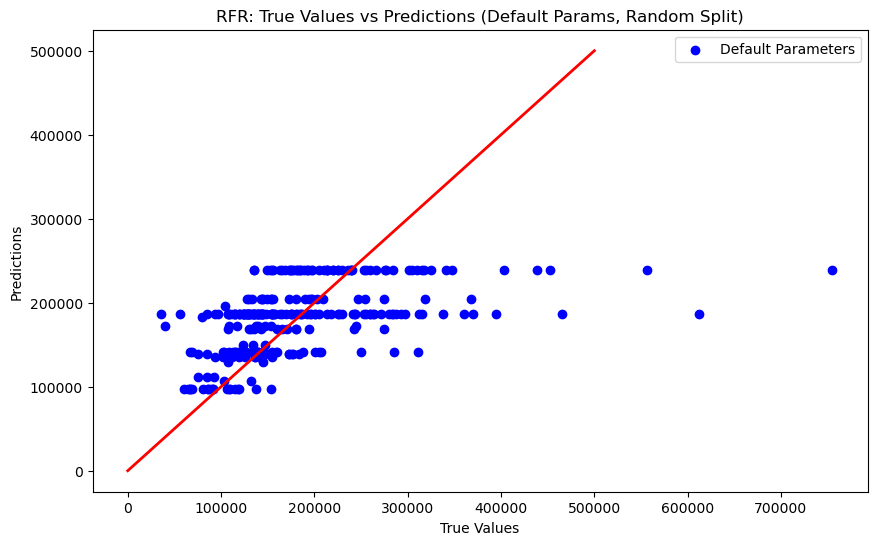

In [9]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rand, y_pred_rand, color='blue', label='Default Parameters')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('RFR: True Values vs Predictions (Default Params, Random Split)')
plt.plot([0, 500000], [0, 500000], color='red', linewidth=2)
plt.legend()
plt.show();
